In [1]:
#import normalizing
from sklearn import preprocessing
# Pandas for data frames
import pandas as pd
import numpy as np
# Metrics
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import manhattan_distances
import matplotlib.pyplot as plt
# Clustering
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
## Prep Work
# Load in the data
path ='/content/drive/MyDrive/STAT 4680/STAT 4680 - Team Project!/'
from google.colab import drive
drive.mount('/content/drive')
file = 'minnesota_data.csv'

clustering_data = pd.read_csv('/content/drive/MyDrive/STAT 4680/STAT 4680 - Team Project!/minnesota_stats_newvar.csv')
clustering_data.head()

print(clustering_data.head())


Mounted at /content/drive
   Unnamed: 0  PLAYER_ID      PLAYER_NAME NICKNAME     TEAM_ID  \
0           0    1630162  Anthony Edwards  Anthony  1610612750   
1           1     203085    Austin Rivers   Austin  1610612750   
2           2    1627854      Bryn Forbes     Bryn  1610612750   
3           3    1630183  Jaden McDaniels    Jaden  1610612750   
4           4    1629669    Jaylen Nowell   Jaylen  1610612750   

  TEAM_ABBREVIATION   AGE  GP   W   L  ...  WEIGHT  NET_RATING  \
0               MIN  21.0  79  40  39  ...     225         1.9   
1               MIN  30.0  52  25  27  ...     200        -4.9   
2               MIN  29.0  25   9  16  ...     205        -8.5   
3               MIN  22.0  79  41  38  ...     185         2.0   
4               MIN  23.0  65  34  31  ...     201         0.0   

   CONTESTED_SHOTS  OFF_RATING  DEF_RATING    PIE  USG_PCT  POSS  DEF_WS  \
0         0.057342       113.8       111.9  0.125    0.292  6016   0.116   
1         0.039615       109

# Clustering


In [2]:
# Normalizing will remove labels so we want to pull them off first then return them
labels = clustering_data.pop("PLAYER_ID")
names = clustering_data.pop("PLAYER_NAME")
ages = clustering_data["AGE"]

# Make names variable names + age
names = ["{} {}".format(a,b) for a,b in zip(names, ages)]
print(names)
print(clustering_data.head())

['Anthony Edwards 21.0', 'Austin Rivers 30.0', 'Bryn Forbes 29.0', 'Jaden McDaniels 22.0', 'Jaylen Nowell 23.0', 'Jordan McLaughlin 27.0', 'Josh Minott 20.0', 'Karl-Anthony Towns 27.0', 'Kyle Anderson 29.0', 'Luka Garza 24.0', 'Matt Ryan 26.0', 'Mike Conley 35.0', 'Nathan Knight 25.0', 'Naz Reid 23.0', 'Nickeil Alexander-Walker 24.0', 'Rudy Gobert 31.0', 'Taurean Prince 29.0', 'Wendell Moore Jr. 21.0', 'Anthony Edwards 20.0', "D'Angelo Russell 26.0", 'Greg Monroe 32.0', 'Jaden McDaniels 21.0', 'Jake Layman 28.0', 'Jarred Vanderbilt 23.0', 'Jaylen Nowell 22.0', 'Jordan McLaughlin 26.0', 'Josh Okogie 23.0', 'Karl-Anthony Towns 26.0', 'Leandro Bolmaro 21.0', 'Malik Beasley 25.0', 'McKinley Wright IV 23.0', 'Nathan Knight 24.0', 'Naz Reid 22.0', 'Patrick Beverley 33.0', 'Taurean Prince 28.0', 'Anthony Edwards 19.0', "D'Angelo Russell 25.0", 'Ed Davis 32.0', 'Jaden McDaniels 20.0', 'Jake Layman 27.0', 'Jarred Vanderbilt 22.0', 'Jarrett Culver 22.0', 'Jaylen Nowell 21.0', 'Jordan McLaughlin 

<Figure size 300x600 with 0 Axes>

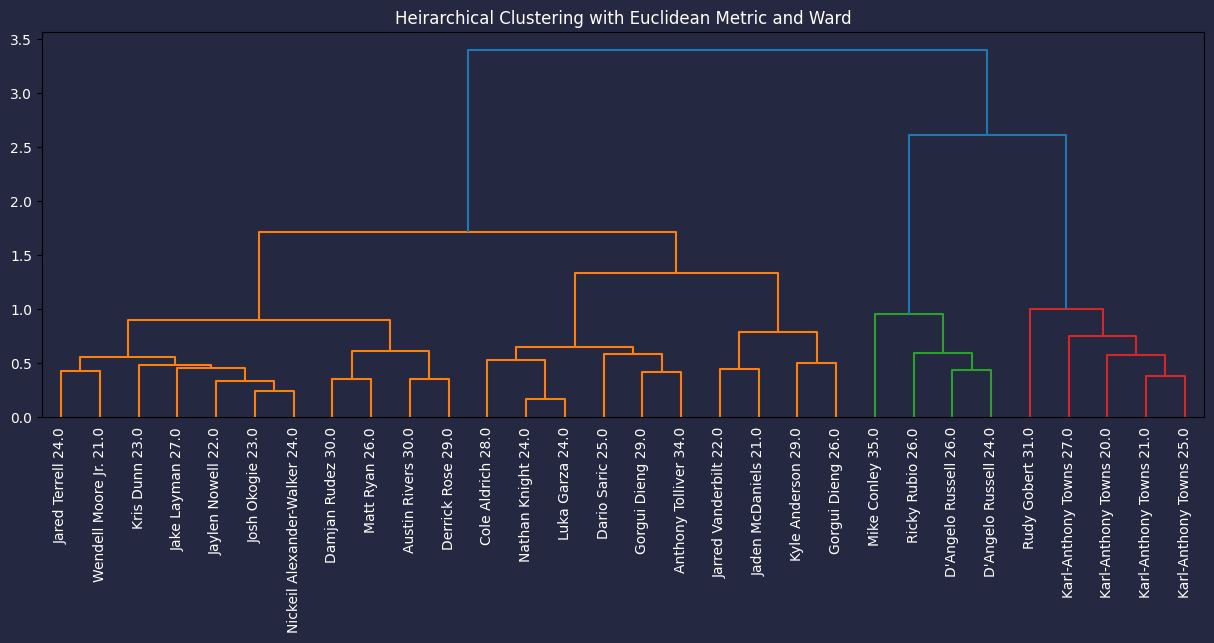

In [3]:
from scipy.cluster.hierarchy import linkage

initial_clustering = clustering_data[['HEIGHT', 'WEIGHT', 'AGE',  'PTS'  , 'FT_PCT', 'FG3_PCT', 'FG_PCT', 'REB', 'AST', 'STL', 'TOV', 'BLK']]
min_max_scaler = preprocessing.MinMaxScaler()
scaled = min_max_scaler.fit_transform(initial_clustering)
final_initial = pd.DataFrame(scaled, index = names).sample(n=30, random_state = 12)

euclidDist = euclidean_distances(final_initial)

#print(np.round(euclidDist,3))
linkage_matrix_o = linkage(final_initial, method = 'ward', metric = 'euclidean') #define the linkage_matrix
#using ward clustering pre-computed distances

#print(linkage_matrix)
fig = plt.figure(figsize=(3, 6))

fig, ax = plt.subplots(facecolor = '#242841')
ax.set_facecolor('#242841')
plt.title("Heirarchical Clustering with Euclidean Metric and Ward", color = "white")
ax.tick_params(labelcolor='white')
dn = dendrogram(linkage_matrix_o ,labels = final_initial.index, leaf_rotation = 90, distance_sort='ascending')
plt.gcf().set_size_inches(15, 5)

plt.show()

In [4]:
# Defensive: Contested Shots, Blocks, Steals, Rebounds
# Offensive: Shot_distance, FGP, FTP, F3P, Points
# Playmaking/Misc: Height, Weight, Assists, TOV, PF,

offensive_variables_for_clustering = clustering_data[['FGM', 'FG3M', 'FTM',  'PTS'  , 'SHOT_DISTANCE', 'FGA', 'FTA', 'FG3A']]
deffensive_variables_for_clustering = clustering_data[['CONTESTED_SHOTS', 'REB', 'STL', 'BLK']]
playmaking_variables_for_clustering = clustering_data[['TOV', 'HEIGHT','WEIGHT', 'AST', 'PF']]

In [5]:
offensive_variables_for_clustering.head()

,FGM,FG3M,FTM,PTS,SHOT_DISTANCE,FGA,FTA,FG3A
0,8.9,2.7,4.0,24.6,13.414017,19.5,5.3,7.3
1,1.8,0.8,0.6,4.9,15.148325,4.0,0.8,2.4
2,1.2,0.6,0.6,3.6,18.445783,3.3,0.6,1.8
3,4.7,1.4,1.3,12.1,12.032123,9.1,1.8,3.4
4,4.3,1.0,1.2,10.8,13.025600,9.6,1.5,3.6


In [6]:
# Now we just need to normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
scaled_offensive = min_max_scaler.fit_transform(offensive_variables_for_clustering)
final_offensive = pd.DataFrame(scaled_offensive, index = names).sample(n=30 , random_state=8)

scaled_deffensive = min_max_scaler.fit_transform(deffensive_variables_for_clustering)
final_deffensive = pd.DataFrame(scaled_deffensive, index = names).sample(n=30, random_state =10)

scaled_playmaking = min_max_scaler.fit_transform(playmaking_variables_for_clustering)
final_playmaking = pd.DataFrame(scaled_playmaking, index = names).sample(n=30, random_state = 10)

In [ ]:

# We will reduce the size of to 30 to make vizualization possible
#sample = final_clustering_data#.sample(n=100)

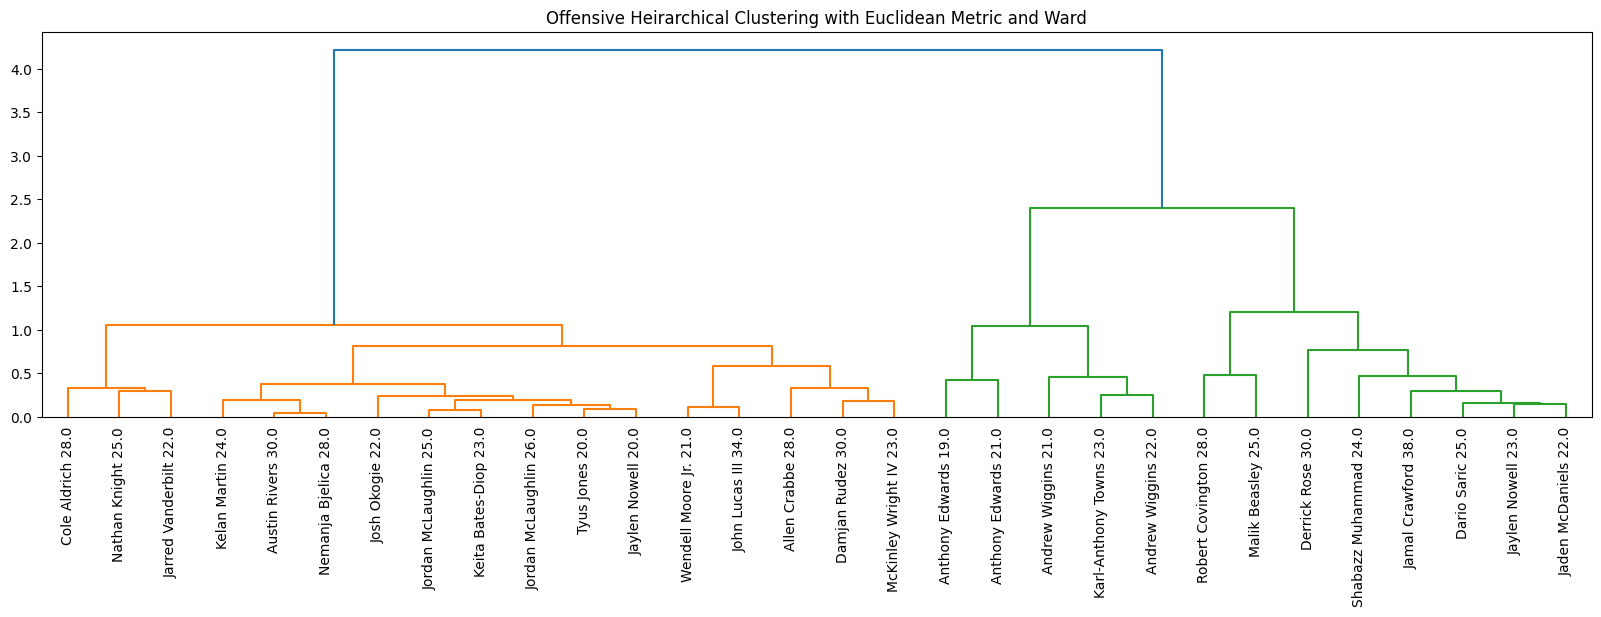

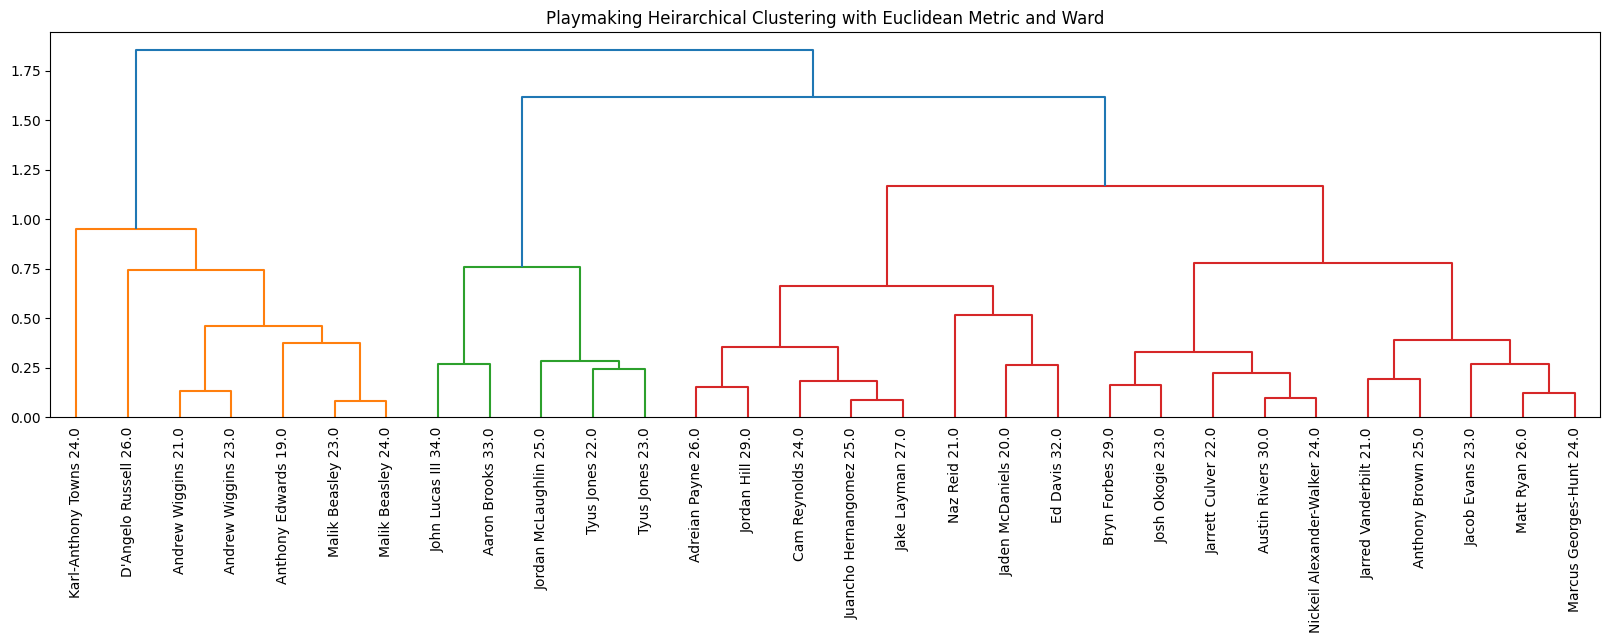

In [7]:

########### HEIRARCHICAL CLUSTERING with Ward   ##################

# For this we will use ConsineSim Ward, and also use minkowski p=2, and p=infinity for fun
# Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
# Code below from Professor Ami Gates


#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html options for metrics
#----------------------------------------------------------
## Hierarchical Clustering using ward and cosine sim


#cosdist = 1 - cosine_similarity(sample)
#print(np.round(cosdist,3))
#linkage_matrix = linkage(sample, method = 'single', metric = 'cosine') #define the linkage_matrix
#using ward clustering pre-computed distances

# #print(linkage_matrix)
# fig = plt.figure(figsize=(20, 5))
# plt.title("Heirarchical Clustering with CosSim and Single method")
# dn = dendrogram(linkage_matrix ,labels = sample.index)
# plt.show()

euclidDist_o = euclidean_distances(final_offensive)
euclidDist_p = euclidean_distances(final_playmaking)

#print(np.round(euclidDist,3))
linkage_matrix_o = linkage(final_offensive, method = 'ward', metric = 'euclidean') #define the linkage_matrix
linkage_matrix_d = linkage(final_deffensive, method = 'ward', metric = 'euclidean') #define the linkage_matrix
linkage_matrix_p = linkage(final_playmaking, method = 'ward', metric = 'euclidean') #define the linkage_matrix
#using ward clustering pre-computed distances

#print(linkage_matrix)
fig = plt.figure(figsize=(20, 5))
plt.title("Offensive Heirarchical Clustering with Euclidean Metric and Ward")
dn = dendrogram(linkage_matrix_o ,labels = final_offensive.index, leaf_rotation = 90, distance_sort='ascending'
                )
plt.show()


fig = plt.figure(figsize=(20, 5))
plt.title("Playmaking Heirarchical Clustering with Euclidean Metric and Ward")
dn = dendrogram(linkage_matrix_p ,labels = final_playmaking.index, leaf_rotation = 90, distance_sort='ascending'
                )
plt.show()
# l1Dist = manhattan_distances(sample)
# #print(np.round(l1Dist,3))
# linkage_matrix = linkage(sample, method = 'single', metric = 'cityblock') #define the linkage_matrix
#using ward clustering pre-computed distances

# #print(linkage_matrix)
# fig = plt.figure(figsize=(20, 5))
# plt.title("Heirarchical Clustering with Manhattan Metric and Single method")
# dn = dendrogram(linkage_matrix ,labels = sample.index)
# plt.show()



<Figure size 2000x500 with 0 Axes>

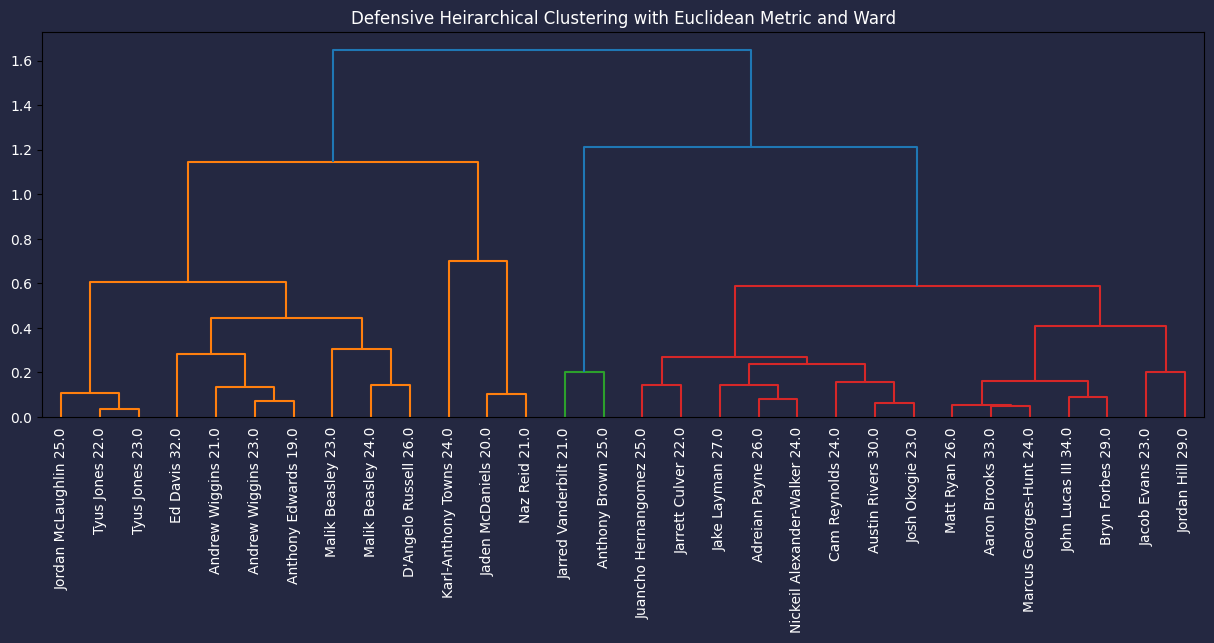

In [ ]:
euclidDist_d = euclidean_distances(final_deffensive)
linkage_matrix_d = linkage(final_deffensive, method = 'ward', metric = 'euclidean') #define the linkage_matrix

fig = plt.figure(figsize=(20, 5))

fig, ax = plt.subplots(facecolor = '#242841')
ax.set_facecolor('#242841')
plt.title("Defensive Heirarchical Clustering with Euclidean Metric and Ward", color = "white")
ax.tick_params(labelcolor='white')

dn = dendrogram(linkage_matrix_d ,labels = final_deffensive.index, leaf_rotation = 90, distance_sort='ascending')
plt.gcf().set_size_inches(15, 5)
plt.show()



<Figure size 2000x500 with 0 Axes>

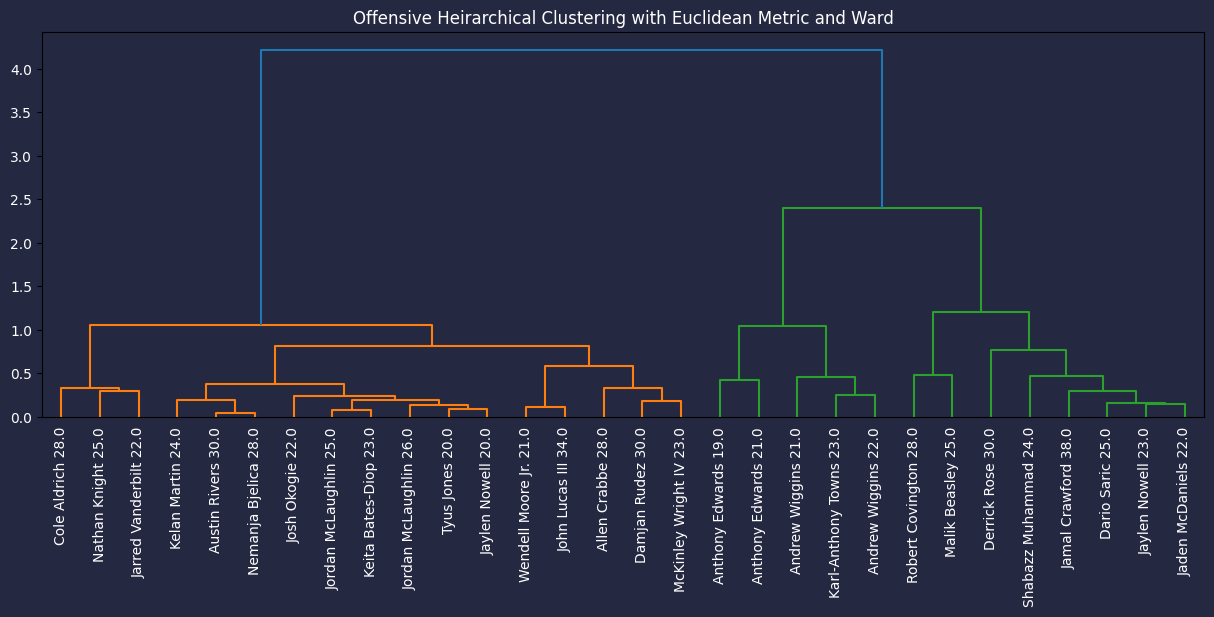

In [12]:
euclidDist_o = euclidean_distances(final_offensive)
linkage_matrix_o = linkage(final_offensive, method = 'ward', metric = 'euclidean') #define the linkage_matrix

fig = plt.figure(figsize=(20, 5))
fig, ax = plt.subplots(facecolor = '#242841')
ax.set_facecolor('#242841')

plt.title("Offensive Heirarchical Clustering with Euclidean Metric and Ward", color = "white")
ax.tick_params(labelcolor='white')

dn = dendrogram(linkage_matrix_o ,labels = final_offensive.index, leaf_rotation = 90, distance_sort='ascending'
                )
plt.gcf().set_size_inches(15, 5)

plt.show()




In [ ]:
offensive_clusters = scipy.cluster.hierarchy.fcluster(linkage_matrix_o, t=1.5, criterion='distance')

offensive_data = {'Name': final_offensive.index,
        'cluster': offensive_clusters}

df = pd.DataFrame(offensive_data).sort_values(by = 'cluster')
print(df.to_markdown())

|     | Name                          |   cluster |
|----:|:------------------------------|----------:|
|  76 | Karl-Anthony Towns 23.0       |         1 |
|  46 | Karl-Anthony Towns 25.0       |         1 |
|  65 | Andrew Wiggins 24.0           |         1 |
|  70 | Derrick Rose 30.0             |         1 |
|  84 | Andrew Wiggins 23.0           |         1 |
|  91 | Jimmy Butler 28.0             |         1 |
|   7 | Karl-Anthony Towns 27.0       |         1 |
|  27 | Karl-Anthony Towns 26.0       |         1 |
|  99 | Andrew Wiggins 22.0           |         1 |
| 105 | Karl-Anthony Towns 21.0       |         1 |
| 114 | Andrew Wiggins 21.0           |         1 |
| 118 | Karl-Anthony Towns 20.0       |         1 |
|  93 | Karl-Anthony Towns 22.0       |         1 |
|  80 | Robert Covington 28.0         |         2 |
|  29 | Malik Beasley 25.0            |         2 |
| 112 | Zach LaVine 22.0              |         2 |
|  61 | Karl-Anthony Towns 24.0       |         2 |
|  60 | Juan

In [ ]:
deffensive_clusters = scipy.cluster.hierarchy.fcluster(linkage_matrix_o, t=1.5, criterion='distance')

deffensive_data = {'Name': final_deffensive.index,
        'cluster': deffensive_clusters}

df = pd.DataFrame(deffensive_data).sort_values(by = 'cluster')
print(df.to_markdown())

|     | Name                          |   cluster |
|----:|:------------------------------|----------:|
|  76 | Karl-Anthony Towns 23.0       |         1 |
|  46 | Karl-Anthony Towns 25.0       |         1 |
|  65 | Andrew Wiggins 24.0           |         1 |
|  70 | Derrick Rose 30.0             |         1 |
|  84 | Andrew Wiggins 23.0           |         1 |
|  91 | Jimmy Butler 28.0             |         1 |
|   7 | Karl-Anthony Towns 27.0       |         1 |
|  27 | Karl-Anthony Towns 26.0       |         1 |
|  99 | Andrew Wiggins 22.0           |         1 |
| 105 | Karl-Anthony Towns 21.0       |         1 |
| 114 | Andrew Wiggins 21.0           |         1 |
| 118 | Karl-Anthony Towns 20.0       |         1 |
|  93 | Karl-Anthony Towns 22.0       |         1 |
|  80 | Robert Covington 28.0         |         2 |
|  29 | Malik Beasley 25.0            |         2 |
| 112 | Zach LaVine 22.0              |         2 |
|  61 | Karl-Anthony Towns 24.0       |         2 |
|  60 | Juan

In [ ]:
playmaking_clusters = scipy.cluster.hierarchy.fcluster(linkage_matrix_o, t=1.5, criterion='distance')

playmaking_data = {'Name': final_playmaking.index,
        'cluster': playmaking_clusters}

df = pd.DataFrame(playmaking_data).sort_values(by = 'cluster')
print(df.to_markdown())

|     | Name                          |   cluster |
|----:|:------------------------------|----------:|
|  76 | Karl-Anthony Towns 23.0       |         1 |
|  46 | Karl-Anthony Towns 25.0       |         1 |
|  65 | Andrew Wiggins 24.0           |         1 |
|  70 | Derrick Rose 30.0             |         1 |
|  84 | Andrew Wiggins 23.0           |         1 |
|  91 | Jimmy Butler 28.0             |         1 |
|   7 | Karl-Anthony Towns 27.0       |         1 |
|  27 | Karl-Anthony Towns 26.0       |         1 |
|  99 | Andrew Wiggins 22.0           |         1 |
| 105 | Karl-Anthony Towns 21.0       |         1 |
| 114 | Andrew Wiggins 21.0           |         1 |
| 118 | Karl-Anthony Towns 20.0       |         1 |
|  93 | Karl-Anthony Towns 22.0       |         1 |
|  80 | Robert Covington 28.0         |         2 |
|  29 | Malik Beasley 25.0            |         2 |
| 112 | Zach LaVine 22.0              |         2 |
|  61 | Karl-Anthony Towns 24.0       |         2 |
|  60 | Juan

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components='mle')
pca.fit(final_clustering_data)

NameError: ignored

In [ ]:
print(pca.explained_variance_ratio_)